## GAN minimax
### Elaborating on CS231n A3/Q5, inline questions 1, 2 and 3 in GANs-PyTorch.ipynb.

### INLINE QUESTION 1
We will look at an example to see why alternating minimization of the same objective (like in a GAN) can be tricky business.

Consider $f(x,y)=xy$. What does $\min_x\max_y f(x,y)$ evaluate to? (Hint: minmax tries to minimize the maximum value achievable.)

Now try to evaluate this function numerically for 6 steps, starting at the point $(1,1)$, 
by using alternating gradient (first updating y, then updating x) with step size $1$. 
You'll find that writing out the update step in terms of $x_t,y_t,x_{t+1},y_{t+1}$ will be useful.

Record the six pairs of explicit values for $(x_t,y_t)$ in the table below.

### INLINE QUESTION 2
Using this method, will we ever reach the optimal value? Why or why not?

### INLINE QUESTION 3
If the generator loss decreases during training while the discriminator loss stays at a constant high value from the start, is this a good sign? Why or why not? A qualitative answer is sufficient


### Answer Q1:

 $y_0$ | $y_1$ | $y_2$ | $y_3$ | $y_4$ | $y_5$ | $y_6$ 
 ----- | ----- | ----- | ----- | ----- | ----- | ----- 
   1   |   2   |   1   |   -1  |   -2  |  -1   |  1       
 $x_0$ | $x_1$ | $x_2$ | $x_3$ | $x_4$ | $x_5$ | $x_6$ 
   1   |   -1  |  -2   |  -1   |  1    |  2    |  1      


$y_{t+1} = df(x_t, y_t) / dy_t$

$dy_t = x_ty_t$

$y_{t+1} = y_t + dy_t$ ; Maximize y, Gradient Ascent

$x_t = df(x_t, y_{t+1}) / dx_t$

$dx_t = x_ty_{t+1}$

$x_{t+1} = x_t - dx_t$ ; Minimize x, Gradient Descent


In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 10.0) # Set default size of plots.
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [5]:
def plot_data(plot_y, plot_x, 
              title=None, xlabel=None, ylabel=None, legend_y=None, legend_x=None):
    '''
    Visualize x, y in f(x,y).
    '''
    plt.subplot(2, 1, 2)
    plt.plot(plot_y, label=legend_y)
    plt.plot(plot_x, label=legend_x)
    plt.legend()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True, which="both")
    plt.show()

In [12]:
def plot_data_logy(plot_y, plot_x, 
                   title=None, xlabel=None, ylabel=None, legend_y=None, legend_x=None):
    '''
    Visualize x, y in f(x,y). Log y scale.
    '''
    plt.subplot(2, 1, 2)
    plt.plot(plot_y, label=legend_y)
    plt.plot(plot_x, label=legend_x)
    plt.yscale('log')
    plt.legend()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True, which="both")
    plt.show()

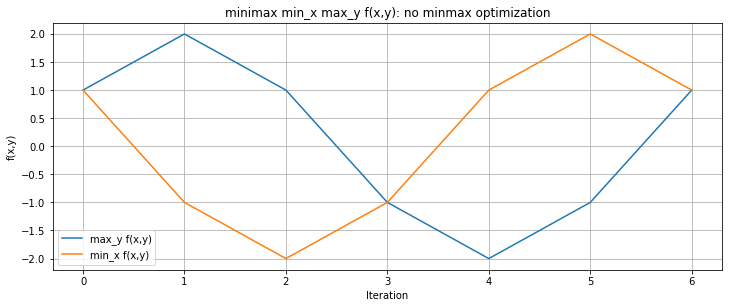

In [16]:
#-------------------------------------------------------------------------------
# min_x max_y f(x,y)  
#-------------------------------------------------------------------------------
plot_y = []
plot_x = []
y = np.zeros((7))
x = np.zeros((7))
y[0]=1
x[0]=1
plot_y.append(y[0])
plot_x.append(x[0])

N = y.shape[0]
for t in range(N-1):
    dy_t = x[t]
    y[t+1] = y[t] + dy_t    # Objective: maximize D loss by gradient ascent step.
    dx_t = y[t+1]
    x[t+1] = x[t] - dx_t    # Objective: minimize G loss by gradient descent step.
    plot_y.append(y[t+1])
    plot_x.append(x[t+1])
    
plot_data(plot_y, 
          plot_x, 
          title='minimax min_x max_y f(x,y): no minmax optimization', 
          xlabel='Iteration', 
          ylabel='f(x,y)', 
          legend_y='max_y f(x,y)', 
          legend_x='min_x f(x,y)')

### Answer Q2:
We will never reach the optimal value because the gradient update steps are too big when we get close to the optimum for D so that we shoot over the optimum and then trying to optimize the G loss in a next iteration based on the D loss of the previous step and the same problem repeats over and over again.

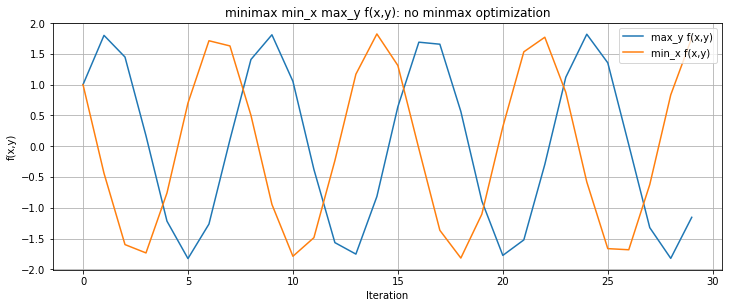

In [18]:
#-------------------------------------------------------------------------------
# min_x max_y f(x,y)  
#-------------------------------------------------------------------------------
plot_y = []
plot_x = []
y = np.zeros((30))
x = np.zeros((30))
y[0]=1
x[0]=1
plot_y.append(y[0])
plot_x.append(x[0])

N = y.shape[0]
for t in range(N-1):
    dy_t = x[t]
    y[t+1] = y[t] + 0.8 * dy_t
    dx_t = y[t+1]
    x[t+1] = x[t] - 0.8 * dx_t
    plot_y.append(y[t+1])
    plot_x.append(x[t+1])

plot_data(plot_y, 
          plot_x, 
          title='minimax min_x max_y f(x,y): no minmax optimization', 
          xlabel='Iteration', 
          ylabel='f(x,y)', 
          legend_y='max_y f(x,y)', 
          legend_x='min_x f(x,y)')

In [23]:
def bce_loss(input, target):
    """
    Numerically stable version of the binary cross-entropy loss function.
    
    Inputs:
    - input: Scalar value representing a score.
    - target: Scalar value containing 0 or 1 giving targets.

    Returns:
    - Scalar value of BCE loss.
    """
    neg_abs = - np.abs(input)
    loss = max(0, input) - input * target + np.log((1 + np.exp(neg_abs)))
    return loss

def discriminator_loss(logits_real, logits_fake):
    l_x = bce_loss(logits_real, 1)
    l_Gz = bce_loss(logits_fake, 0)
    loss = l_x + l_Gz
    return loss

def generator_loss(logits_fake):
    loss = bce_loss(logits_fake, 1)
    return loss

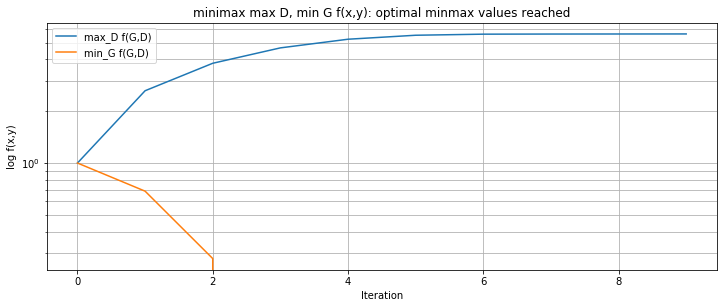

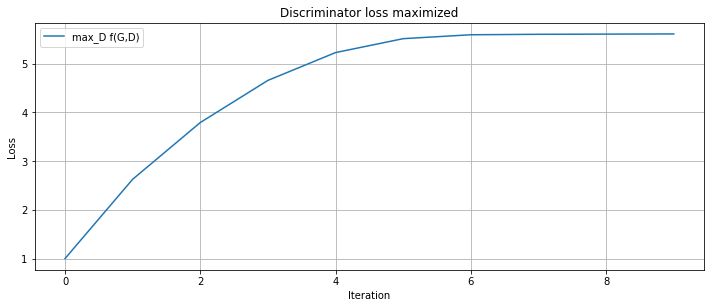

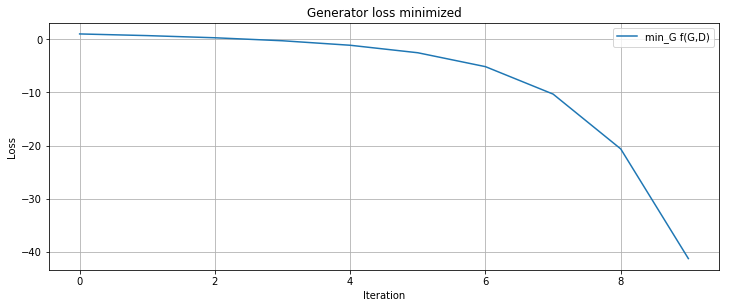

In [35]:
#-------------------------------------------------------------------------------
# min_x max_y f(x,y)  
#-------------------------------------------------------------------------------
plot_y = []
plot_x = []
y = np.zeros((10))
x = np.zeros((10))
y[0]=1.0
x[0]=1.0
plot_y.append(y[0])
plot_x.append(x[0])

N = y.shape[0]
for t in range(N-1):
    dy_t = discriminator_loss(y[t], x[t])
    y[t+1] = y[t] + dy_t                    # Objective: maximize D loss
    
    dx_t = generator_loss(x[t])
    x[t+1] = x[t] - dx_t                    # Objective: minimize G loss
    
    plot_y.append(y[t+1])
    plot_x.append(x[t+1])
    
plot_data_logy(plot_y, 
               plot_x, 
               title='minimax max D, min G f(x,y): optimal minmax values reached', 
               xlabel='Iteration', 
               ylabel='log f(x,y)', 
               legend_y='max_D f(G,D)',
               legend_x='min_G f(G,D)')
plot_data(plot_y, 
          [], 
          title='Discriminator loss maximized', 
          xlabel='Iteration', 
          ylabel='Loss', 
          legend_y='max_D f(G,D)')
plot_data(plot_x, 
          [], 
          title='Generator loss minimized', 
          xlabel='Iteration', 
          ylabel='Loss', 
          legend_y='min_G f(G,D)')

### Answer Q3:
It is a good sign if the generator loss decreases during training while the discriminator loss stays at a constant high value from the start because it proves that the minmax optimization objective is met.